In [2]:
#Multiclass classifier

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("car_evaluation.csv")
print(df)

     Buyingprice ManitenanceCost  Doors Persons lug_bootsize safety Decision
0          vhigh           vhigh      2       2        small    low    unacc
1          vhigh           vhigh      2       2        small    med    unacc
2          vhigh           vhigh      2       2        small   high    unacc
3          vhigh           vhigh      2       2          med    low    unacc
4          vhigh           vhigh      2       2          med    med    unacc
5          vhigh           vhigh      2       2          med   high    unacc
6          vhigh           vhigh      2       2          big    low    unacc
7          vhigh           vhigh      2       2          big    med    unacc
8          vhigh           vhigh      2       2          big   high    unacc
9          vhigh           vhigh      2       4        small    low    unacc
10         vhigh           vhigh      2       4        small    med    unacc
11         vhigh           vhigh      2       4        small   high    unacc

In [3]:
#Convert Strings to Numbers
from sklearn.preprocessing import LabelEncoder

In [4]:
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])
print(df.head())

   Buyingprice  ManitenanceCost  Doors  Persons  lug_bootsize  safety  \
0            3                3      0        0             2       1   
1            3                3      0        0             2       2   
2            3                3      0        0             2       0   
3            3                3      0        0             1       1   
4            3                3      0        0             1       2   

   Decision  
0         2  
1         2  
2         2  
3         2  
4         2  


In [5]:
print(df)

      Buyingprice  ManitenanceCost  Doors  Persons  lug_bootsize  safety  \
0               3                3      0        0             2       1   
1               3                3      0        0             2       2   
2               3                3      0        0             2       0   
3               3                3      0        0             1       1   
4               3                3      0        0             1       2   
5               3                3      0        0             1       0   
6               3                3      0        0             0       1   
7               3                3      0        0             0       2   
8               3                3      0        0             0       0   
9               3                3      0        1             2       1   
10              3                3      0        1             2       2   
11              3                3      0        1             2       0   
12          

In [112]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve,auc
from sklearn import cluster

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np

In [33]:
car = df.values

In [34]:
X,y = car[:,:6], car[:,6]
X,y = X.astype(int), y.astype(int)

In [35]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.3,random_state=0)

In [36]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100, '%')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(metrics.classification_report(y_test, y_pred, target_names=["unacc","acc","good","vgood"]))

Accuracy: 77.26396917148362 %
[[115   0   0   0]
 [ 25   0   0   0]
 [ 77   0 286   0]
 [ 16   0   0   0]]
             precision    recall  f1-score   support

      unacc       0.49      1.00      0.66       115
        acc       0.00      0.00      0.00        25
       good       1.00      0.79      0.88       363
      vgood       0.00      0.00      0.00        16

avg / total       0.81      0.77      0.76       519



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


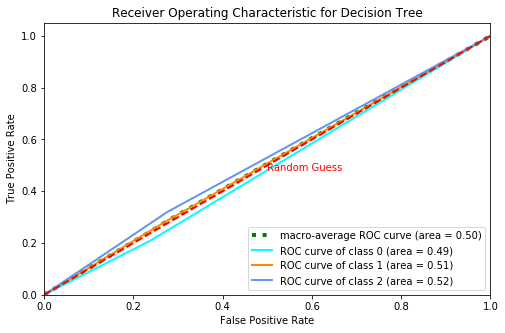

In [119]:
t1=sum(x==0 for x in y_pred-y_test)/len(y_pred)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()
from scipy import interp
from itertools import cycle
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_pred))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test)
print("Accuracy:",gnb.score(X_test, y_test)*100, '%')
cm = confusion_matrix(y_test, gnb_predictions)
print(cm)
print(metrics.classification_report(y_test, gnb_predictions, target_names=["unacc","acc","good","vgood"]))

Accuracy: 61.46435452793835 %
[[  7   0  51  57]
 [  4   0  10  11]
 [ 10   0 296  57]
 [  0   0   0  16]]
             precision    recall  f1-score   support

      unacc       0.33      0.06      0.10       115
        acc       0.00      0.00      0.00        25
       good       0.83      0.82      0.82       363
      vgood       0.11      1.00      0.20        16

avg / total       0.66      0.61      0.60       519



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


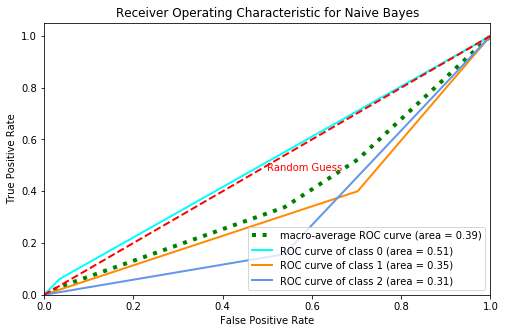

In [118]:
t1=sum(x==0 for x in gnb_predictions-y_test)/len(gnb_predictions)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()
from scipy import interp
from itertools import cycle
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(gnb_predictions))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [104]:
from sklearn.cluster import KMeans

In [105]:
clf = cluster.KMeans(init='k-means++', n_clusters=4, random_state=0)
clf = clf.fit(X_train,y_train)

In [106]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100, '%')
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(metrics.classification_report(y_test, y_pred, target_names=["unacc","acc","good","vgood"]))

Accuracy: 28.516377649325626 %
[[ 24  31  38  22]
 [  6   7   4   8]
 [ 85  93 116  69]
 [  5   9   1   1]]
             precision    recall  f1-score   support

      unacc       0.20      0.21      0.20       115
        acc       0.05      0.28      0.08        25
       good       0.73      0.32      0.44       363
      vgood       0.01      0.06      0.02        16

avg / total       0.56      0.29      0.36       519



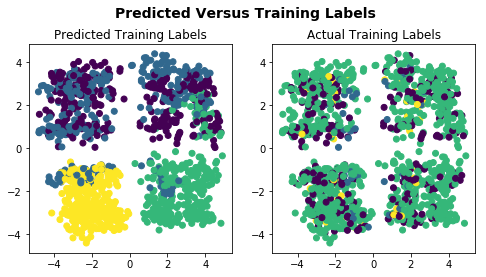

In [109]:
# Import `Isomap()`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=4).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

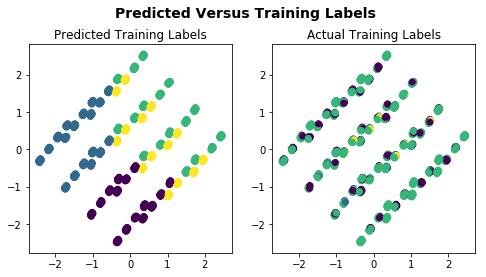

In [110]:
# Import `PCA()`
from sklearn.decomposition import PCA

# Model and fit the `digits` data to the PCA model
X_pca = PCA(n_components=4).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()